# **OPEN CV**

**SAVING IMAGE**

In [ ]:
# importing cv2 
import cv2
  
# importing os module  
import os
  
# Image path
image_path = r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\background.png"
  
# Image directory
directory = r"C:\Users\Admin\OneDrive\Pictures"
  
# Using cv2.imread() method
# to read the image
img = cv2.imread(image_path)
  
# Change the current directory 
# to specified directory 
os.chdir(directory)
  
# List files and directories  
print("Before saving image:")  
print(os.listdir(directory))  
  
# Filename
filename = 'savedImage.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, img)
  
# List files and directories  
print("After saving image:")  
print(os.listdir(directory))
  
print('Successfully saved')

Before saving image:
['background.png', 'Camera Roll', 'desktop.ini', 'Saved Pictures', 'Screenshot 2023-05-27 112837.jpg', 'Screenshot 2023-05-27 112938.jpg', 'Screenshots']
After saving image:
['background.png', 'Camera Roll', 'desktop.ini', 'Saved Pictures', 'savedImage.jpg', 'Screenshot 2023-05-27 112837.jpg', 'Screenshot 2023-05-27 112938.jpg', 'Screenshots']
Successfully saved


**Rezizing of image**

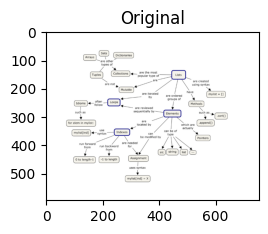

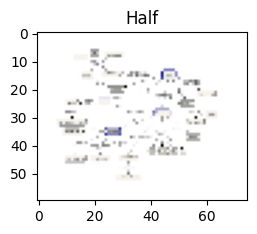

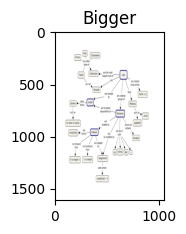

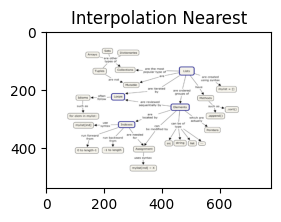

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
image = cv2.imread(r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\background.png", 1)
# Loading the image
 
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))
 
stretch_near = cv2.resize(image, (780, 540),
               interpolation = cv2.INTER_LINEAR)
 
 
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
    
 
    plt.show("Half")

**BACKGROUND BLUR**

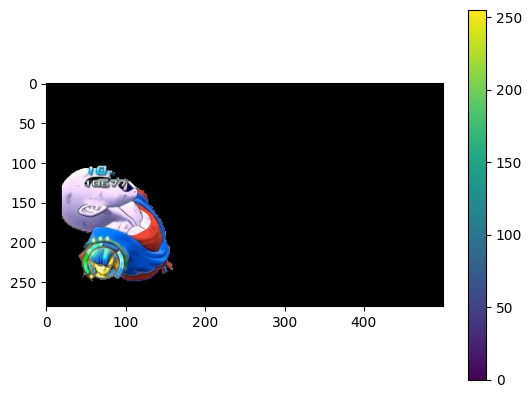

In [ ]:
# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt
  
# path to input image specified and
image = cv2.imread(r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\google.jpg")
  
# create a simple mask image similar to the loaded image, with the shape and return type
mask = np.zeros(image.shape[:2], np.uint8)
  
# specify the background and foreground model using numpy the array is constructed of 1 row and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
  
# define the Region of Interest (ROI) as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image it may vary for different images
rectangle = (20, 100, 150, 150)
  
# apply the grabcut algorithm with appropriate values as parameters, number of iterations = 3
# cv2.GC_INIT_WITH_RECT is used becauseof the rectangle mode is used
cv2.grabCut(image, mask, rectangle, 
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
  
# In the new mask image, pixels will
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
  
# The final mask is multiplied with the input image to give the segmented image.
image = image * mask2[:, :, np.newaxis]
  
# output segmented image with colorbar
plt.imshow(image)
plt.colorbar()
plt.show()

**IMAGE OUTLIER**

Python | Morphological Operations in Image Processing (Opening)

In [1]:
# organizing imports  
import cv2  
import numpy as np  
  
# return video from the first webcam on your computer.  
screenRead = cv2.VideoCapture(0)
  
# loop runs if capturing has been initialized.
while(1):
    # reads frames from a camera
    _, image = screenRead.read()
      
    # Converts to HSV color space, OCV reads colors as BGR 
    # frame is converted to hsv
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
      
    # defining the range of masking
    blue1 = np.array([110, 50, 50])
    blue2 = np.array([130, 255, 255])
      
    # initializing the mask to be
    # convoluted over input image
    mask = cv2.inRange(hsv, blue1, blue2)
  
    # passing the bitwise_and over
    # each pixel convoluted
    res = cv2.bitwise_and(image, image, mask = mask)
      
    # defining the kernel i.e. Structuring element
    kernel = np.ones((5, 5), np.uint8)
      
    # defining the closing function 
    # over the image and structuring element
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
     
    # The mask and closing operation
    # is shown in the window 
    cv2.imshow('Mask', mask)
    cv2.imshow('Closing', closing)
      
    # Wait for 'a' key to stop the program 
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break
  
# De-allocate any associated memory usage  
cv2.destroyAllWindows()
  
# Close the window / Release webcam 
screenRead.release()

**OpenCV Python Program to analyze an image using Histogram**

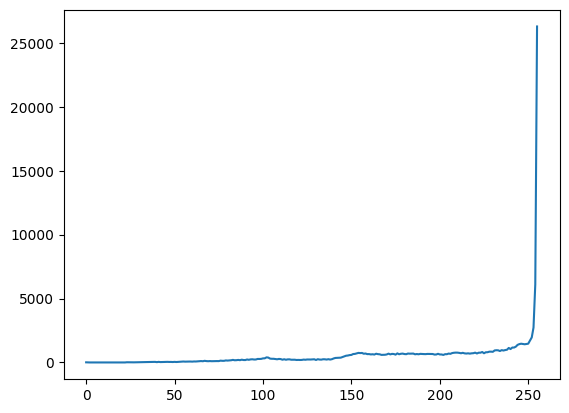

In [ ]:
# importing required libraries of opencv
import cv2
  
# importing library for plotting
from matplotlib import pyplot as plt
  
# reads an input image
img = cv2.imread(r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\google.jpg",0)
  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

**image translation**

In [ ]:
import cv2
import numpy as np
  
image = cv2.imread(r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\words.jpg")
  
# Store height and width of the image
height, width = image.shape[:2]
  
quarter_height, quarter_width = height / 5, width / 5
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
  
cv2.imshow("Originalimage", image)
cv2.imshow('Translation', img_translation)
cv2.waitKey()
  
cv2.destroyAllWindows()

**play video**

In [ ]:
# importing libraries
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture("C:\\Users\\Admin\\Videos\promo.mp4")
 
# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")
 
# Read until video is completed
while(cap.isOpened()):
     
# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
    # Display the resulting frame
        cv2.imshow('Frame', frame)
         
    # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
# Break the loop
    else:
        break
 
# When everything done, release
# the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

**creating a video**

In [ ]:
# importing libraries
import os
import cv2 
from PIL import Image 
  
# Checking the current directory path
print(os.getcwd()) 
  
# Folder which contains all the images, from which video is to be generated
os.chdir(r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\sameer\sameer")  
path = r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\sameer\sameer"

num_of_images = 0
mean_width = 0
mean_height = 0

for file in os.listdir(path):
    file_path = os.path.join(path, file)
    if os.path.isfile(file_path) and file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        im = Image.open(file_path)
        width, height = im.size
        mean_width += width
        mean_height += height
        num_of_images += 1

mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)

print("Number of images: ", num_of_images)
print("Mean width: ", mean_width)
print("Mean height: ", mean_height)

# resizing 
for file in os.listdir(path):
    file_path = os.path.join(path, file)
    if os.path.isfile(file_path) and file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        im = Image.open(file_path)
        width, height = im.size
        imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS)
        imResize.save(file_path, 'JPEG', quality=95) # setting quality
        print(file_path)
  
  
# Video Generating function
def generate_video():
    image_folder = '.' # make sure to use your folder
    video_name = 'mygeneratedvideo.avi'
    os.chdir(r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\sameer")
      
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
     
    # Array images should only consider
    # the image files ignoring others if any
    print(images) 
  
    frame = cv2.imread(os.path.join(image_folder, images[0]))
  
    # setting the frame width, height width, the width, height of first image
    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter(video_name, 0, 1, (width, height)) 
  
    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
      
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
  
  
# Calling the generate_video function
generate_video()

**Extracting images**

In [ ]:
# Importing all necessary libraries
import cv2
import os
  
# Read the video from specified path
cam = cv2.VideoCapture(r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\sameer\mygeneratedvideo.avi")
  
try:
      
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  
# frame
currentframe = 0
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
 # Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg


**Read Video**

In [ ]:
# Program To Read video
# and Extract Frames
 
import cv2
 
# Function to extract frames
def FrameCapture(path):
 
    # Path to video file
    vidObj = cv2.VideoCapture(path)
 
    # Used as counter variable
    count = 0
 
    # checks whether frames were extracted
    success = 1
 
    while success:
 
        # vidObj object calls read
        # function extract frames
        success, image = vidObj.read()
 
        # Saves the frames with frame-count
        cv2.imwrite("frame%d.jpg" % count, image)
 
        count += 1
 
 
# Driver Code
if __name__ == '__main__':
 
    # Calling the function
    FrameCapture("C:\\Users\\Admin\\Videos\\promo.mp4")

**Face Ditection**

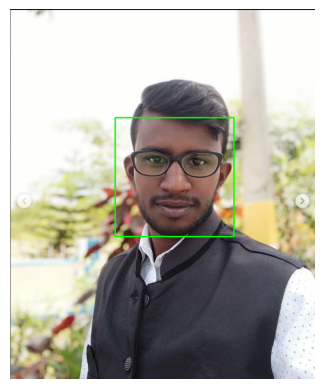

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread(r"D:\Intractive Python Project\Special Activity\CV Turtle\Image\sameer.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.show()